# Yahoo Finance

- https://cran.r-project.org/web/packages/yahoofinancer/index.html

In [1]:
# Libraries
library(tidyverse)
library(rvest)
library(httr2)
library(yahoofinancer)

Warning message:
"package 'ggplot2' was built under R version 4.5.2"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'rvest'


The following object is masked from 'package:readr':

    guess_encoding


Warning message:
"package 'yahoofinancer' was built under R version 4.5.2"


In [2]:
# nVidia stock
nvidia <-  Ticker$new("NVDA")
nvidia

<Ticker>
  Public:
    clone: function (deep = FALSE) 
    currency: active binding
    exchange_name: active binding
    exchange_timezone_name: active binding
    fifty_two_week_high: active binding
    fifty_two_week_low: active binding
    first_trade_date: active binding
    full_exchange_name: active binding
    get_history: function (period = "ytd", interval = "1d", start = NULL, end = NULL) 
    initialize: function (symbol = NA) 
    previous_close: active binding
    recommendations: active binding
    regular_market_day_high: active binding
    regular_market_day_low: active binding
    regular_market_price: active binding
    regular_market_time: active binding
    regular_market_volume: active binding
    set_symbol: function (symbol) 
    symbol: NVDA
    technical_insights: active binding
    timezone: active binding
    valuation_measures: active binding
  Private:
    base_url: https://query2.finance.yahoo.com
    cors_domain: finance.yahoo.com
    extract_valuation: f

In [21]:
nvidia_df <- nvidia$get_history(start = ymd("1900-01-01"), interval="1d") # |> as_tibble()
nvidia_df |> head()

,date,volume,high,low,open,close,adj_close
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>
1,1999-01-22 14:30:00,2714688000,0.048828,0.038802,0.043750,0.041016,0.03760488
2,1999-01-25 14:30:00,510480000,0.045833,0.041016,0.044271,0.045313,0.04154452
3,1999-01-26 14:30:00,343200000,0.046745,0.041146,0.045833,0.041797,0.03832094
4,1999-01-27 14:30:00,244368000,0.042969,0.039583,0.041927,0.041667,0.03820173
5,1999-01-28 14:30:00,227520000,0.041927,0.041276,0.041667,0.041536,0.03808163
6,1999-01-29 14:30:00,244032000,0.041667,0.039583,0.041536,0.039583,0.03629106


In [22]:
nvidia_df |> tail()

,date,volume,high,low,open,close,adj_close
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>
6779,2026-01-02 14:30:00,148240500,192.93,188.2600,189.840,188.85,188.85
6780,2026-01-05 14:30:00,183529700,193.63,186.1500,191.760,188.12,188.12
6781,2026-01-06 14:30:00,176862600,192.17,186.8200,190.520,187.24,187.24
6782,2026-01-07 14:30:00,153543200,191.37,186.5600,188.570,189.11,189.11
6783,2026-01-08 14:30:00,172457000,189.55,183.7100,189.110,185.04,185.04
6784,2026-01-09 20:12:32,100241985,186.34,183.6701,185.055,185.82,185.82


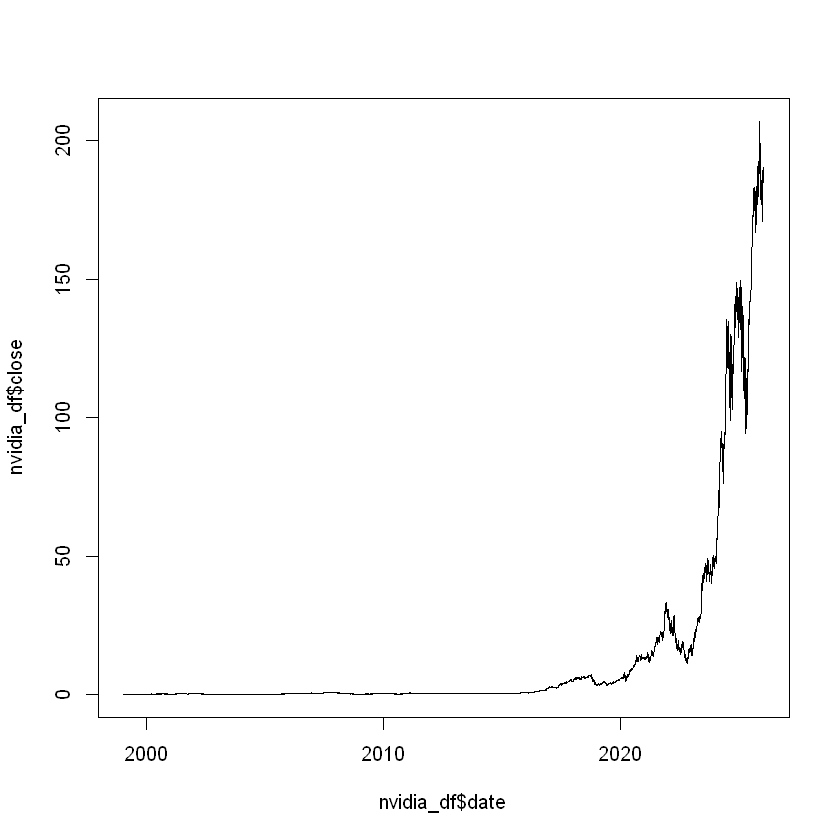

In [27]:
plot(x=nvidia_df$date, y=nvidia_df$close, type="l")